# Python для инженерии данных

## Тема 6. Библиотеки NumPy и Pandas. Визуализация данных
### Домашнее задание

#### Задание 1

На основании датасета для кадого покупателя нужно получить:

+ предпочитаемый метод оплаты;
+ общие траты;
+ количество денег, потраченных на дополнительные услуги и аксессуары.

In [23]:
import numpy as np
import pandas as pd

In [27]:
df = pd.read_csv('sales.csv', delimiter=',')
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [45]:
preferred_payment = (df.groupby('Customer ID')['Payment Method']
                       .agg(lambda x: x.value_counts().idxmax())
                    ).reset_index()
preferred_payment.columns = ['Customer', 'Payment Method']

print(preferred_payment.head(10))

   Customer Payment Method
0      1000    Credit Card
1      1002    Credit Card
2      1003           Cash
3      1004    Credit Card
4      1005         Paypal
5      1006     Debit Card
6      1007    Credit Card
7      1008           Cash
8      1011    Credit Card
9      1013         Paypal


In [43]:
total_cost = df.groupby('Customer ID')['Total Price'].sum().reset_index()
total_cost.columns = ['Customer ID', 'Total Price']

print(total_cost.head(10))

   Customer ID  Total Price
0         1000      6279.42
1         1002      5020.60
2         1003        41.50
3         1004        83.00
4         1005     11779.11
5         1006     12184.27
6         1007      7120.71
7         1008      3379.32
8         1011      7911.90
9         1013      5538.33


In [41]:
add_cost = df.groupby('Customer ID')['Add-on Total'].sum().reset_index()
add_cost.columns = ['Customer ID', 'Add-on Total']

print(add_cost.head(10))

   Customer ID  Add-on Total
0         1000         66.30
1         1002         60.16
2         1003         35.56
3         1004         65.78
4         1005         75.33
5         1006        133.43
6         1007         55.48
7         1008         65.85
8         1011         70.17
9         1013         57.81


#### Задание 2

1. На основании датасета получите доход:
+ по каждому методу доставки
+ по каждому типу продукта
+ по дополнительный слугам за каждый месяц
+ по дополнительный услугам за каждый квартал
  ал.
2. Отобразите полученные данные на графике.

In [52]:
import matplotlib.pyplot as plt

1. Доход по каждому методу доставки:

In [ ]:
income_by_delivery = df.groupby('Shipping Type')['Total Price'].sum().reset_index()

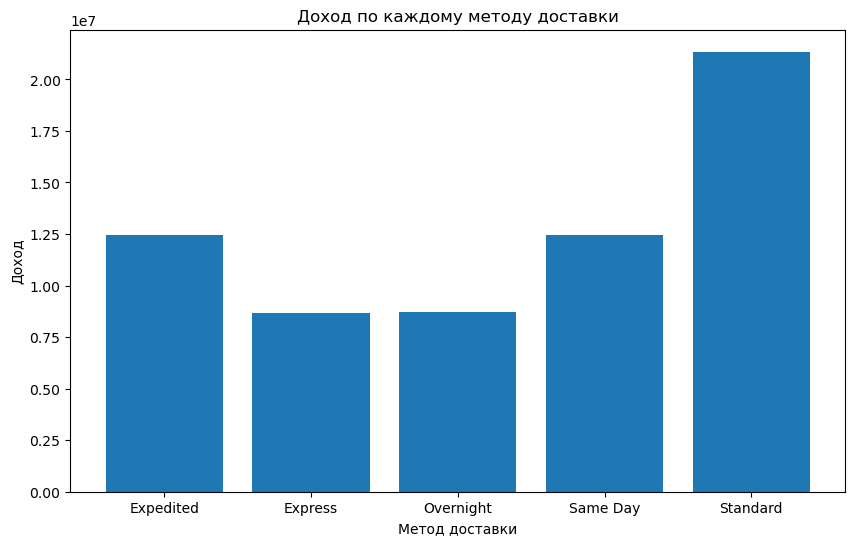

In [79]:
# График дохода по каждому методу доставки
plt.figure(figsize=(10, 6))
plt.bar(income_by_delivery['Shipping Type'], income_by_delivery['Total Price'])
plt.title('Доход по каждому методу доставки')
plt.xlabel('Метод доставки')
plt.ylabel('Доход')
plt.show()

2. Доход по каждому типу продукта:


In [61]:
income_by_product  = df.groupby('Product Type')['Total Price'].sum().reset_index()

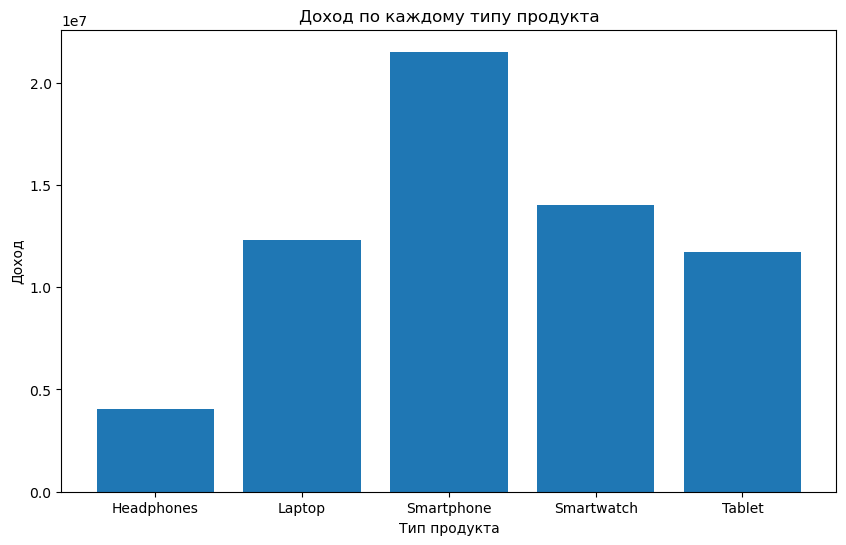

In [81]:
# График дохода по каждому типу продукта
plt.figure(figsize=(10, 6))
plt.bar(income_by_product['Product Type'], income_by_product['Total Price'])
plt.title('Доход по каждому типу продукта')
plt.xlabel('Тип продукта')
plt.ylabel('Доход')
plt.show()


3. Доход по дополнительным услугам за каждый месяц:

In [70]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [74]:
# Добавление столбца месяца
df['month'] = df['Purchase Date'].dt.to_period('M')

# Доход по дополнительным услугам за каждый месяц
income_by_services_month = df.groupby(['Add-ons Purchased', 'month'])['Add-on Total'].sum().reset_index()

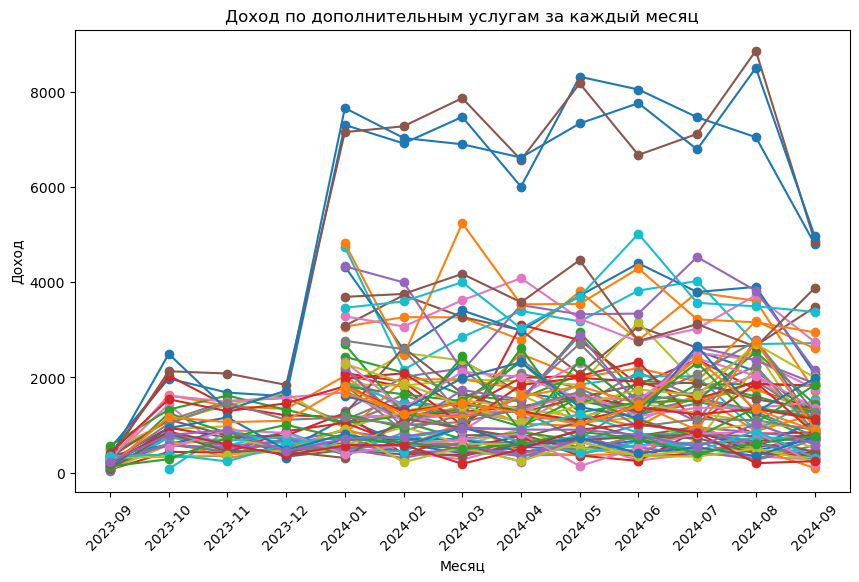

In [99]:
# График дохода по дополнительным услугам за каждый месяц
plt.figure(figsize=(10, 6))
for service in income_by_services_month['Add-ons Purchased'].unique():
    monthly_data = income_by_services_month[income_by_services_month['Add-ons Purchased'] == service]
    plt.plot(monthly_data['month'].astype(str), monthly_data['Add-on Total'], marker='o', label=service)

plt.title('Доход по дополнительным услугам за каждый месяц')
plt.xlabel('Месяц')
plt.xticks(rotation=45)

plt.ylabel('Доход')
#plt.legend()
plt.show()


4. Доход по дополнительным услугам за каждый квартал:


In [77]:
# Добавление столбца квартала
df['quarter'] = df['Purchase Date'].dt.to_period('Q')

# Доход по дополнительным услугам за каждый квартал
income_by_services_quarter = df.groupby(['Add-ons Purchased', 'quarter'])['Add-on Total'].sum().reset_index()

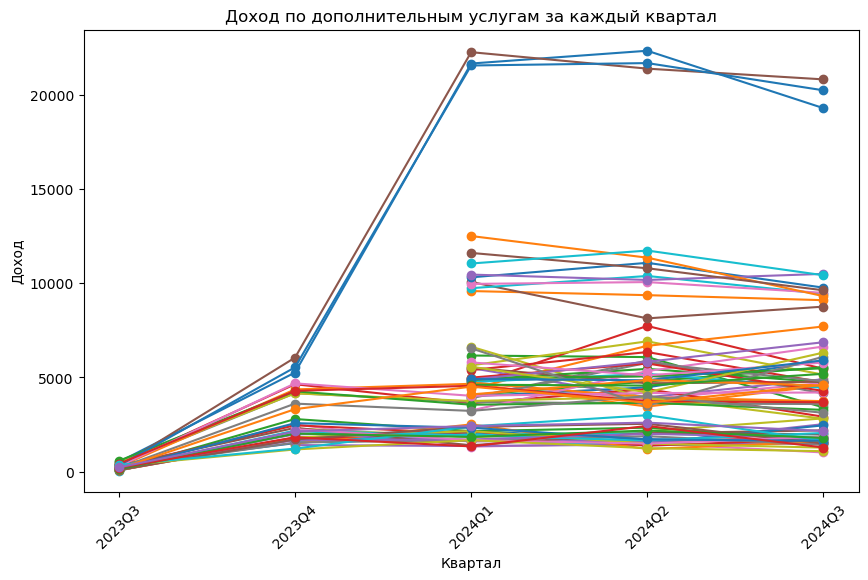

In [101]:
# График дохода по дополнительным услугам за каждый квартал
plt.figure(figsize=(10, 6))
for service in income_by_services_quarter['Add-ons Purchased'].unique():
    quarterly_data = income_by_services_quarter[income_by_services_quarter['Add-ons Purchased'] == service]
    plt.plot(quarterly_data['quarter'].astype(str), quarterly_data['Add-on Total'], marker='o', label=service)

plt.title('Доход по дополнительным услугам за каждый квартал')
plt.xlabel('Квартал')
plt.ylabel('Доход')
plt.xticks(rotation=45)

#plt.legend()
plt.show()
